### Luca Dal Zotto   1236343
# Optimization for Data Science - Homework 1



In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Import the data
data = pd.read_csv('breastcancer.csv')

# Show the first 5 rows of the dataset
data.head()

,A.1053_at,A.200039_s_at,A.200053_at,A.200079_s_at,A.200628_s_at,A.200639_s_at,A.200670_at,A.200687_s_at,A.200710_at,A.200740_s_at,...,B.243754_at,B.243806_at,B.244116_at,B.244375_at,B.244571_s_at,B.244677_at,B.244696_at,B.AFFX.HUMGAPDH.M33197_3_at,B.AFFX.HUMGAPDH.M33197_M_at,code
0,-178.07400,-162.81300,0.95049,-0.92321,-0.76512,-0.82299,0.14885,-0.16353,156.08900,-0.43334,...,-119.31600,0.38201,0.80869,148.40500,0.93375,188.42500,0.79498,-0.34428,-0.45370,control
1,0.77860,103.82900,27.80400,0.86301,280.37300,116.87800,-182.51500,0.94768,-118.57900,-0.90655,...,414.43100,-156.82400,-129.93700,-0.71467,-0.53362,0.29520,-0.79119,0.52271,0.34805,control
2,-0.09262,-0.49349,240.43300,-0.97493,-125.63300,-0.46814,0.38507,-0.09930,181.21100,-0.16871,...,-0.29822,-0.04139,-0.40590,161.40200,100.48900,0.41590,-0.83669,0.67591,0.59034,control
3,-0.94097,-146.44200,0.41952,-0.09367,-0.88072,-0.02752,0.25956,0.81404,131.59900,-181.79700,...,-128.23500,133.18200,131.97300,0.44038,-0.34298,-0.50842,152.16700,0.22996,-0.07909,control
4,-0.37998,112.91100,114.43900,-0.03021,0.02694,-0.88384,136.29900,-0.79516,0.78018,0.00896,...,-0.28505,-150.53500,208.46600,0.94317,0.15134,-0.81930,107.53700,0.25983,0.73937,control


In [3]:
# Check the dimensionality of the problem
m = data.shape[0]
n = data.shape[1]
print('- Number of observations:', m)
print('- Number of attributes:', n)

- Number of observations: 250
- Number of attributes: 1001


### Data pre-processing

In [4]:
# Create the feature matrix and the label vector
X = np.array(data.iloc[:, :-1], dtype=float)
y = np.array(data.iloc[:,-1])
y = y.reshape(-1,1)
y[y=='control'] = -1
y[y=='case'] = 1
y = np.array(y, dtype = float)

In [5]:
# Normalize the dataset
x_mu, x_std = X.mean(axis=0), X.std(axis=0)
X = (X - x_mu) / x_std

In [6]:
# Add a column of ones - the bias term
# X = np.concatenate([X, np.ones([len(X), 1], dtype=np.float32)], axis=-1)

In [7]:
# Check the dimensionality of the problem
print('- Shape of the feature matrix:', X.shape)
print('- Shape of the label vector:', y.shape)

- Shape of the feature matrix: (250, 1000)
- Shape of the label vector: (250, 1)


### The Regularized Logistic Regression problem

In [8]:
# Loss function
def h(X,y,w):
    return np.sum(np.log(1 + np.exp(-y*np.dot(X,w))))/len(X) + Lambda*np.sum(w*w)/(2*len(X))

In [9]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))    
    return s

In [10]:
# Gradient of the loss function
# ATT: it is the sum for i from 1 to m of the gradients of h_i divided by m (number of rows of X)
def grad(X,y,w):
    return (-np.sum(np.dot(X.T, y * (1 - sigmoid(y*np.dot(X,w)))) , axis = 1, keepdims = True ) + Lambda*w/250)/len(X)

### Implementation of the three methods

In [11]:
def GD(X, y, w, alpha, maxit, Lambda, fstop = 0):

  # Implementation of the Gradient Descent method

  # INPUT:
  # X = feature matrix
  # y = labels
  # w = initial vector of parameters
  # alpha = fixed step-size
  # maxit = max number of iterations
  # Lambda = regularization term
  # fstop = target loss function value

  # OUTPUT:
  # w = final values of the parameters
  # it = number of iterations
  # hw = final value of the loss function
  # ttot = total CPU time expired
  # loss_history = vector of the loss funcion at each iteration
  # timeVec = vector of the CPU time required by each iteration

  # Initialize time and loss vectors
  loss_history = []
  timeVec = []

  # Compute the starting value of the loss 
  hw = h(X,y,w)
  loss_history.append(hw)

  # Start the time
  start_time = time.time()
  
  for it in range(maxit):

      # add the cumulative time for each iteraction
      timeVec.append(time.time() - start_time)

      # check the stopping criteria: loss lower than target value fstop
      if hw <= fstop:
          loss_history.append(hw)
          break

      # gradient evaluation
      g = grad(X,y,w).reshape(-1,1)
      
      d = - g

      # parameters update  
      w = w + (alpha * d)

      # loss evaluation
      hw = h(X,y,w)        
      loss_history.append(hw)


  ttot = time.time() - start_time
  timeVec.append(ttot)

  return [w,it+1,hw,ttot,loss_history,timeVec]

In [12]:
def SGD(X, y, w, alpha, maxit, Lambda, fstop = 0):

  # Implementation of the Stochastic Gradient Descent method

  # INPUT:
  # X = feature matrix
  # y = labels
  # w = initial vector of parameters
  # alpha = starting step-size
  # maxit = max number of iterations
  # Lambda = regularization term
  # fstop = target loss function value

  # OUTPUT:
  # w = final values of the parameters
  # it = number of iterations
  # hw = final value of the loss function
  # ttot = total CPU time expired
  # loss_history = vector of the loss funcion at each iteration
  # timeVec = vector of the CPU time required by each iteration

  # Initialize time and loss vectors  
  loss_history = []
  timeVec = []

  # Compute the starting value of the loss 
  hw = h(X,y,w)
  loss_history.append(hw)

  # start the time
  start_time = time.time()
  timeVec.append(time.time() - start_time)
  
  for it in range(maxit):

      # check the stopping criteria: loss lower than target value fstop
      if hw <= fstop:
          break

      # gradient evaluation
      # pick a random index
      ind = np.random.randint(len(X))
      # update the corresponding component
      g = grad(X[ind,:].reshape(1,-1), y[ind,:].reshape(1,-1), w)
      d = - g

      # reduced alpha
#       alpha = alpha/(it+1)
      alpha = np.sqrt(alpha*2/(it+1))
#       alpha = np.sqrt(alpha/(it/5+100))
      # alpha = np.sqrt(alpha/(it/100 + 10000))
      # alpha = (alpha/(it+20000))**(1/2)

      # parameters update  
      w = w + alpha * d

      # new loss evaluation every 10000 iterations
      if it%30 == 0:
        hw = h(X,y,w)        
        loss_history.append(hw)

        # add the cumulative time every 10000 iteractions
        timeVec.append(time.time() - start_time)
      

  ttot = time.time() - start_time

  return [w,it+1,hw,ttot,loss_history,timeVec]

In [13]:
def SVRG(X, y, w_epoch, alpha, l, max_epoch, Lambda, fstop = 0):

  # INPUT:
  # X = feature matrix
  # y = labels
  # w_epoch = initial vector of parameters
  # alpha = fixed step-size
  # l = number of iterations for each epoch
  # max_epoch = max number of epoches
  # Lambda = regularization term
  # fstop = target loss function value

  # OUTPUT:
  # w = final values of the parameters
  # it = number of iterations
  # hw = final value of the loss function
  # ttot = total CPU time expired
  # loss_history = vector of the loss funcion at each iteration
  # timeVec = vector of the CPU time required by each iteration

  # Initialize time and loss vectors  
  loss_history = []
  timeVec = []

  # Compute the starting value of the loss 
  hw = h(X,y,w_epoch)
  loss_history.append(hw)

  # start the time
  start_time = time.time()

  for s in range(max_epoch):

    # check the stopping criteria: loss lower than target value fstop
    if hw <= fstop:
          break

    # add the cumulative time every epoch
    timeVec.append(time.time() - start_time)

    # compute the full gradient using the vector of parameters of the epoch
    full_grad = grad(X,y,w_epoch)

    w_iter = w_epoch

    # Inner loop of each epoch:
    for k in range(l):

      # gradient evaluation
      # pick a random index
      ind = np.random.randint(len(X))
      # compute the ind^th component using the current parameter
      grad_iter_ind = grad(X[ind,:].reshape(1,-1), y[ind,:].reshape(1,-1), w_iter)
      # compute the ind^th component using the epoch's parameter
      grad_epoch_ind = grad(X[ind,:].reshape(1,-1), y[ind,:].reshape(1,-1), w_epoch)
      # compute the direction
      d = -(grad_iter_ind - grad_epoch_ind + full_grad)

      # parameters update 
      w_iter = w_iter + alpha*d

    # once ended the inner loop, compute new epoch's parameter and the new value of the loss function
    w_epoch = w_iter
    hw = h(X,y,w_epoch)        
    loss_history.append(hw)

  
  ttot = time.time() - start_time
  timeVec.append(ttot)

  return [w,(s+1)*(k+1),hw,ttot,loss_history,timeVec]

### Test the methods on the small dataset

In [16]:
# target loss function value:
fstop = 0

# Max number of iterations
maxit_gd = 200
maxit_sgd= 1000
max_epoch = 20
iter_per_epoch = 20

# Step-size
alpha_gd = 0.1
alpha_sgd = 0.1
alpha_svrg = 0.05

# Lambda
Lambda = 0

# starting point
#deterministic initialization
# w0= np.zeros((X.shape[1],1));
# random initialization
np.random.seed(123)
w0 = np.random.uniform(0,1, (X.shape[1],1))

print('***************')
print('*  GD Method  *')
print('***************')

[w,it,hw,ttot,loss_history_gd,timeVec_gd] = GD(X, y, w0, alpha_gd, maxit_gd, Lambda, fstop)


# Print results
print('h(w) = ',hw)
print('Number of iterations = ', it)
print('CPU time so far = ', ttot)
print('')


print('***************')
print('*  SGD Method *')
print('***************')

[w,it,hw,ttot,loss_history_sgd,timeVec_sgd] = SGD(X, y, w0, alpha_sgd, maxit_sgd, Lambda, fstop)

# Print results
print('h(w) = ',hw)
print('Number of iterations = ', it)
print('CPU time so far = ', ttot)
print('')


print('***************')
print('* SVRG Method *')
print('***************')

[w,it,hw,ttot,loss_history_svrg,timeVec_svrg] = SVRG(X, y, w0, alpha_svrg, iter_per_epoch, max_epoch, fstop, Lambda)

# Print results
print('h(w) = ',hw)
print('Number of iterations = ', it)
print('CPU time so far = ', ttot)



***************
*  GD Method  *
***************
h(w) =  0.08022502300014869
Number of iterations =  200
CPU time so far =  0.06641149520874023

***************
*  SGD Method *
***************
h(w) =  5.748610524408246
Number of iterations =  1000
CPU time so far =  0.14719867706298828

***************
* SVRG Method *
***************
h(w) =  0.19205413169157878
Number of iterations =  400
CPU time so far =  0.09107756614685059


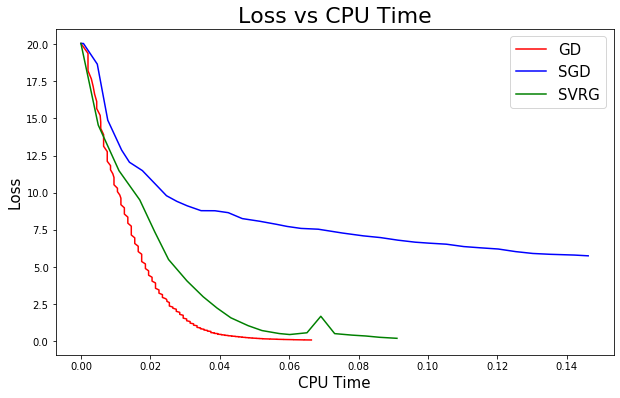

In [17]:
# Plot accuracy vs CPU time
plt.figure(figsize=(10,6))

plt.plot(timeVec_gd,loss_history_gd, color='red')

plt.plot(timeVec_sgd,loss_history_sgd, color='blue')

plt.plot(timeVec_svrg,loss_history_svrg, color='green')

plt.title('Loss vs CPU Time', fontsize=22)
plt.xlabel('CPU Time', fontsize=15)
plt.ylabel('Loss', fontsize=15)
z = plt.legend(('GD','SGD','SVRG'), fontsize=15)


### Test the methods on the large dataset

In [18]:
X_large = np.repeat(X, 1000, axis = 0)
y_large = np.repeat(y, 1000, axis = 0)

In [19]:
# Check the dimensionality of the problem
print('- Shape of the feature matrix:', X_large.shape)
print('- Shape of the label vector:', y_large.shape)

- Shape of the feature matrix: (250000, 1000)
- Shape of the label vector: (250000, 1)


In [20]:
# SGD with a different diminishing step-size

def SGD(X, y, w, alpha, maxit, Lambda, fstop = 0):

  # Implementation of the Stochastic Gradient Descent method

  # INPUT:
  # X = feature matrix
  # y = labels
  # w = initial vector of parameters
  # alpha = starting step-size
  # maxit = max number of iterations
  # Lambda = regularization term
  # fstop = target loss function value

  # OUTPUT:
  # w = final values of the parameters
  # it = number of iterations
  # hw = final value of the loss function
  # ttot = total CPU time expired
  # loss_history = vector of the loss funcion at each iteration
  # timeVec = vector of the CPU time required by each iteration

  # Initialize time and loss vectors  
  loss_history = []
  timeVec = []

  # Compute the starting value of the loss 
  hw = h(X,y,w)
  loss_history.append(hw)

  # start the time
  start_time = time.time()
  timeVec.append(time.time() - start_time)
  
  for it in range(maxit):

      # check the stopping criteria: loss lower than target value fstop
      if hw <= fstop:
          break

      # gradient evaluation
      # pick a random index
      ind = np.random.randint(len(X))
      # update the corresponding component
      g = grad(X[ind,:].reshape(1,-1), y[ind,:].reshape(1,-1), w)
      d = - g

      # reduced alpha
#       alpha = alpha/(it+1)
      alpha = np.sqrt(alpha/(it/17+1))
#       alpha = np.sqrt(alpha*2/(it+1))
#       alpha = np.sqrt(alpha/(it/5+100))
      # alpha = np.sqrt(alpha/(it/100 + 10000))
      # alpha = (alpha/(it+20000))**(1/2)

      # parameters update  
      w = w + alpha * d

      # new loss evaluation every 10000 iterations
      if it%30 == 0:
        hw = h(X,y,w)        
        loss_history.append(hw)

        # add the cumulative time every 10000 iteractions
        timeVec.append(time.time() - start_time)
      

  ttot = time.time() - start_time

  return [w,it+1,hw,ttot,loss_history,timeVec]

In [21]:
# target loss function value:
fstop = 0

# Max number of iterations
maxit_gd = 15 
maxit_sgd= 1000
max_epoch = 15
iter_per_epoch = 20

# Step-size
alpha_gd = 0.5
alpha_sgd = 0.5
alpha_svrg = 0.1

# Lambda
Lambda = 0.01

# starting point
# w0= np.zeros((X.shape[1],1));
np.random.seed(123)
w0 = np.random.uniform(0,1, (X.shape[1],1))


print('***************')
print('*  GD Method  *')
print('***************')

[w,it,hw,ttot,loss_history_gd,timeVec_gd] = GD(X_large, y_large, w0, alpha_gd, maxit_gd, Lambda, fstop)


# Print results
print('h(w) = ',hw)
print('Number of iterations = ', it)
print('CPU time so far = ', ttot)
print('')


print('***************')
print('*  SGD Method *')
print('***************')

[w,it,hw,ttot,loss_history_sgd,timeVec_sgd] = SGD(X_large, y_large, w0, alpha_sgd, maxit_sgd, Lambda, fstop)

# Print results
print('h(w) = ',hw)
print('Number of iterations = ', it)
print('CPU time so far = ', ttot)
print('')


print('***************')
print('* SVRG Method *')
print('***************')

[w,it,hw,ttot,loss_history_svrg,timeVec_svrg] = SVRG(X_large, y_large, w0, alpha_svrg, iter_per_epoch, max_epoch, Lambda, fstop)

# Print results
print('h(w) = ',hw)
print('Number of iterations = ', it)
print('CPU time so far = ', ttot)


***************
*  GD Method  *
***************
h(w) =  2.358971642574822
Number of iterations =  15
CPU time so far =  6.471180438995361

***************
*  SGD Method *
***************
h(w) =  2.5454787604360183
Number of iterations =  1000
CPU time so far =  5.0299787521362305

***************
* SVRG Method *
***************
h(w) =  0.9886291173919602
Number of iterations =  300
CPU time so far =  6.3355138301849365


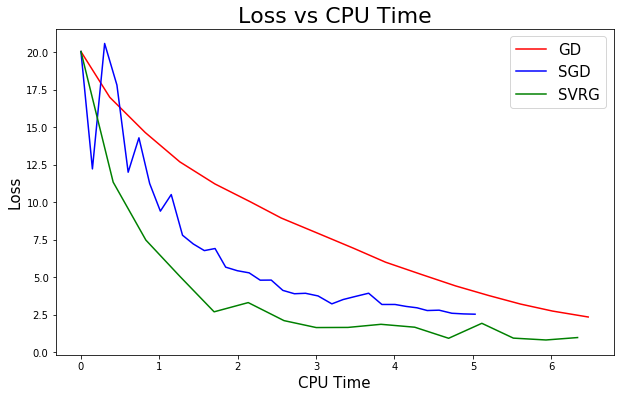

In [22]:
# Plot accuracy vs CPU time
plt.figure(figsize=(10,6))

plt.plot(timeVec_gd,loss_history_gd, color='red')

plt.plot(timeVec_sgd,loss_history_sgd, color='blue')

plt.plot(timeVec_svrg,loss_history_svrg, color='green')

plt.title('Loss vs CPU Time', fontsize=22)
plt.xlabel('CPU Time', fontsize=15)
plt.ylabel('Loss', fontsize=15)
z = plt.legend(('GD','SGD','SVRG'), fontsize=15)


### Compare the CPU time required by the three methods to reach a value of the loss function smaller than 2

In [23]:
# Different diminishing step-size

def SGD(X, y, w, alpha, maxit, Lambda, fstop = 0):

  # Implementation of the Stochastic Gradient Descent method

  # INPUT:
  # X = feature matrix
  # y = labels
  # w = initial vector of parameters
  # alpha = starting step-size
  # maxit = max number of iterations
  # Lambda = regularization term
  # fstop = target loss function value

  # OUTPUT:
  # w = final values of the parameters
  # it = number of iterations
  # hw = final value of the loss function
  # ttot = total CPU time expired
  # loss_history = vector of the loss funcion at each iteration
  # timeVec = vector of the CPU time required by each iteration

  # Initialize time and loss vectors  
  loss_history = []
  timeVec = []

  # Compute the starting value of the loss 
  hw = h(X,y,w)
  loss_history.append(hw)

  # start the time
  start_time = time.time()
  timeVec.append(time.time() - start_time)
  
  for it in range(maxit):

      # check the stopping criteria: loss lower than target value fstop
      if hw <= fstop:
          break

      # gradient evaluation
      # pick a random index
      ind = np.random.randint(len(X))
      # update the corresponding component
      g = grad(X[ind,:].reshape(1,-1), y[ind,:].reshape(1,-1), w)
      d = - g

      # reduced alpha
#       alpha = alpha/(it+1)
      alpha = np.sqrt(alpha/(it/17+1))
#       alpha = np.sqrt(alpha*2/(it+1))
#       alpha = np.sqrt(alpha/(it/5+100))
      # alpha = np.sqrt(alpha/(it/100 + 10000))
      # alpha = (alpha/(it+20000))**(1/2)

      # parameters update  
      w = w + alpha * d

      # new loss evaluation every 10000 iterations
      if it%30 == 0:
        hw = h(X,y,w)        
        loss_history.append(hw)

        # add the cumulative time every 10000 iteractions
        timeVec.append(time.time() - start_time)
      

  ttot = time.time() - start_time

  return [w,it+1,hw,ttot,loss_history,timeVec]

In [24]:
# target loss function value:
fstop = 2

# Max number of iterations
maxit_gd = 20 
maxit_sgd= 1500
max_epoch = 15
iter_per_epoch = 18

# Step-size
alpha_gd = 0.5
alpha_sgd = 0.01
# alphasgd = 0.5
alpha_svrg = 0.1

# Lambda
Lambda = 0.01

# starting point
# w0= np.zeros((X.shape[1],1));
np.random.seed(123)
w0 = np.random.uniform(0,1, (X.shape[1],1))


print('***************')
print('*  GD Method  *')
print('***************')

[w,it,hw,ttot,loss_history_gd,timeVec_gd] = GD(X_large, y_large, w0, alpha_gd, maxit_gd, Lambda, fstop)


# Print results
print('h(w) = ',hw)
print('Number of iterations = ', it)
print('CPU time so far = ', ttot)
print('')


print('***************')
print('*  SGD Method *')
print('***************')

[w,it,hw,ttot,loss_history_sgd,timeVec_sgd] = SGD(X_large, y_large, w0, alpha_sgd, maxit_sgd, Lambda, fstop)


# Print results
print('h(w) = ',hw)
print('Number of iterations = ', it)
print('CPU time so far = ', ttot)
print('')


print('***************')
print('* SVRG Method *')
print('***************')

[w,it,hw,ttot,loss_history_svrg,timeVec_svrg] = SVRG(X_large, y_large, w0, alpha_svrg, iter_per_epoch, max_epoch, Lambda, fstop)

# Print results
print('h(w) = ',hw)
print('Number of iterations = ', it)
print('CPU time so far = ', ttot)

***************
*  GD Method  *
***************
h(w) =  1.6698348295342769
Number of iterations =  18
CPU time so far =  7.066143035888672

***************
*  SGD Method *
***************
h(w) =  1.8615139379663928
Number of iterations =  1322
CPU time so far =  6.500978946685791

***************
* SVRG Method *
***************
h(w) =  1.800522183431801
Number of iterations =  126
CPU time so far =  2.498244285583496


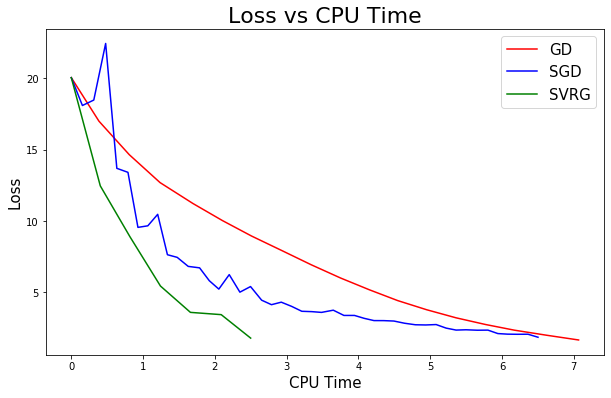

In [25]:
# Plot accuracy vs CPU time
plt.figure(figsize=(10,6))

plt.plot(timeVec_gd,loss_history_gd, color='red')

plt.plot(timeVec_sgd,loss_history_sgd, color='blue')

plt.plot(timeVec_svrg,loss_history_svrg, color='green')

plt.title('Loss vs CPU Time', fontsize=22)
plt.xlabel('CPU Time', fontsize=15)
plt.ylabel('Loss', fontsize=15)
z = plt.legend(('GD','SGD','SVRG'), fontsize=15)


### Different values of the regularization parameter

#### $\lambda$ = 1

In [26]:
# target loss function value:
fstop = 2

# Max number of iterations
maxit_gd = 20 
maxit_sgd= 1000
max_epoch = 15
iter_per_epoch = 20

# Step-size
alpha_gd = 0.5
alpha_sgd = 0.5
alpha_svrg = 0.1

# Lambda
Lambda = 1

# starting point
# w0= np.zeros((X.shape[1],1));
np.random.seed(123)
w0 = np.random.uniform(0,1, (X.shape[1],1))


print('***************')
print('*  GD Method  *')
print('***************')

[w,it,hw,ttot,loss_history_gd,timeVec_gd] = GD(X_large, y_large, w0, alpha_gd, maxit_gd, Lambda, fstop)


# Print results
print('h(w) = ',hw)
print('Number of iterations = ', it)
print('CPU time so far = ', ttot)
print('')


print('***************')
print('*  SGD Method *')
print('***************')

[w,it,hw,ttot,loss_history_sgd,timeVec_sgd] = SGD(X_large, y_large, w0, alpha_sgd, maxit_sgd, Lambda, fstop)

# Print results
print('h(w) = ',hw)
print('Number of iterations = ', it)
print('CPU time so far = ', ttot)
print('')


print('***************')
print('* SVRG Method *')
print('***************')

[w,it,hw,ttot,loss_history_svrg,timeVec_svrg] = SVRG(X_large, y_large, w0, alpha_svrg, iter_per_epoch, max_epoch, Lambda, fstop)

# Print results
print('h(w) = ',hw)
print('Number of iterations = ', it)
print('CPU time so far = ', ttot)


***************
*  GD Method  *
***************
h(w) =  1.6702337972591907
Number of iterations =  18
CPU time so far =  6.980629205703735

***************
*  SGD Method *
***************
h(w) =  1.99179636245301
Number of iterations =  842
CPU time so far =  4.3913257122039795

***************
* SVRG Method *
***************
h(w) =  1.4954731888367785
Number of iterations =  140
CPU time so far =  2.474806070327759


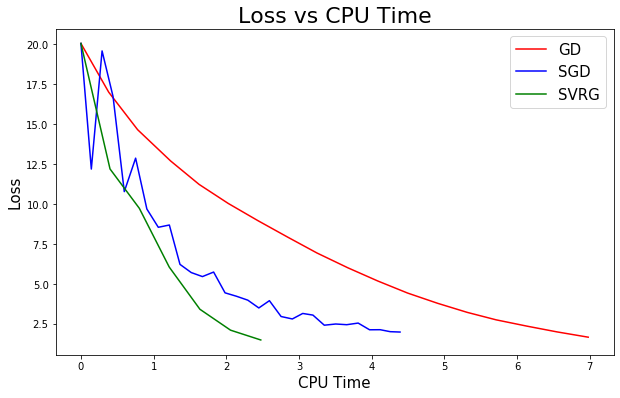

In [27]:
# Plot accuracy vs CPU time
plt.figure(figsize=(10,6))

plt.plot(timeVec_gd,loss_history_gd, color='red')

plt.plot(timeVec_sgd,loss_history_sgd, color='blue')

plt.plot(timeVec_svrg,loss_history_svrg, color='green')

plt.title('Loss vs CPU Time', fontsize=22)
plt.xlabel('CPU Time', fontsize=15)
plt.ylabel('Loss', fontsize=15)
z = plt.legend(('GD','SGD','SVRG'), fontsize=15)


#### $\lambda$ = 10

In [28]:
# target loss function value:
fstop = 2

# Max number of iterations
maxit_gd = 20 
maxit_sgd= 1000
max_epoch = 15
iter_per_epoch = 20

# Step-size
alpha_gd = 0.5
alpha_sgd = 0.5
alpha_svrg = 0.1

# Lambda
Lambda = 10

# starting point
# w0= np.zeros((X.shape[1],1));
np.random.seed(123)
w0 = np.random.uniform(0,1, (X.shape[1],1))


print('***************')
print('*  GD Method  *')
print('***************')

[w,it,hw,ttot,loss_history_gd,timeVec_gd] = GD(X_large, y_large, w0, alpha_gd, maxit_gd, Lambda, fstop)


# Print results
print('h(w) = ',hw)
print('Number of iterations = ', it)
print('CPU time so far = ', ttot)
print('')


print('***************')
print('*  SGD Method *')
print('***************')

[w,it,hw,ttot,loss_history_sgd,timeVec_sgd] = SGD(X_large, y_large, w0, alpha_sgd, maxit_sgd, Lambda, fstop)

# Print results
print('h(w) = ',hw)
print('Number of iterations = ', it)
print('CPU time so far = ', ttot)
print('')


print('***************')
print('* SVRG Method *')
print('***************')

[w,it,hw,ttot,loss_history_svrg,timeVec_svrg] = SVRG(X_large, y_large, w0, alpha_svrg, iter_per_epoch, max_epoch, Lambda, fstop)

# Print results
print('h(w) = ',hw)
print('Number of iterations = ', it)
print('CPU time so far = ', ttot)


***************
*  GD Method  *
***************
h(w) =  1.6738607663703013
Number of iterations =  18
CPU time so far =  7.413094997406006

***************
*  SGD Method *
***************
h(w) =  1.542623273047446
Number of iterations =  362
CPU time so far =  1.8943817615509033

***************
* SVRG Method *
***************
h(w) =  1.8160864539470647
Number of iterations =  220
CPU time so far =  4.136484622955322


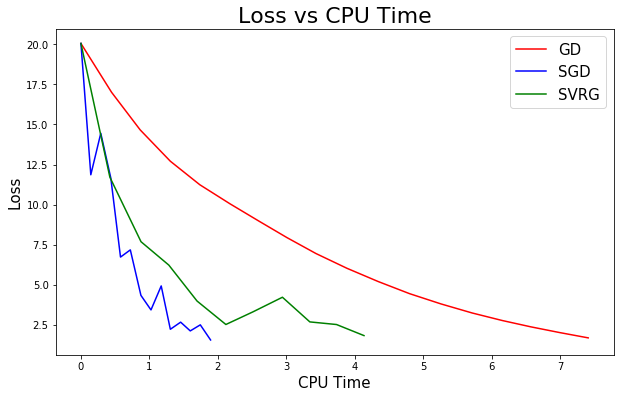

In [29]:
# Plot accuracy vs CPU time
plt.figure(figsize=(10,6))

plt.plot(timeVec_gd,loss_history_gd, color='red')

plt.plot(timeVec_sgd,loss_history_sgd, color='blue')

plt.plot(timeVec_svrg,loss_history_svrg, color='green')

plt.title('Loss vs CPU Time', fontsize=22)
plt.xlabel('CPU Time', fontsize=15)
plt.ylabel('Loss', fontsize=15)
z = plt.legend(('GD','SGD','SVRG'), fontsize=15)


#### $\lambda$ = 50

In [30]:
# target loss function value:
fstop = 2

# Max number of iterations
maxit_gd = 20 
maxit_sgd= 1000
max_epoch = 15
iter_per_epoch = 20

# Step-size
alpha_gd = 0.5
alpha_sgd = 0.5
alpha_svrg = 0.1

# Lambda
Lambda = 50

# starting point
# w0= np.zeros((X.shape[1],1));
np.random.seed(123)
w0 = np.random.uniform(0,1, (X.shape[1],1))


print('***************')
print('*  GD Method  *')
print('***************')

[w,it,hw,ttot,loss_history_gd,timeVec_gd] = GD(X_large, y_large, w0, alpha_gd, maxit_gd, Lambda, fstop)


# Print results
print('h(w) = ',hw)
print('Number of iterations = ', it)
print('CPU time so far = ', ttot)
print('')


print('***************')
print('*  SGD Method *')
print('***************')

[w,it,hw,ttot,loss_history_sgd,timeVec_sgd] = SGD(X_large, y_large, w0, alpha_sgd, maxit_sgd, Lambda, fstop)

# Print results
print('h(w) = ',hw)
print('Number of iterations = ', it)
print('CPU time so far = ', ttot)
print('')


print('***************')
print('* SVRG Method *')
print('***************')

[w,it,hw,ttot,loss_history_svrg,timeVec_svrg] = SVRG(X_large, y_large, w0, alpha_svrg, iter_per_epoch, max_epoch, Lambda, fstop)

# Print results
print('h(w) = ',hw)
print('Number of iterations = ', it)
print('CPU time so far = ', ttot)


***************
*  GD Method  *
***************
h(w) =  1.6899804065928603
Number of iterations =  18
CPU time so far =  7.3231401443481445

***************
*  SGD Method *
***************
h(w) =  1.5553605225137783
Number of iterations =  122
CPU time so far =  0.6823775768280029

***************
* SVRG Method *
***************
h(w) =  1.8564001899303924
Number of iterations =  180
CPU time so far =  3.354271650314331


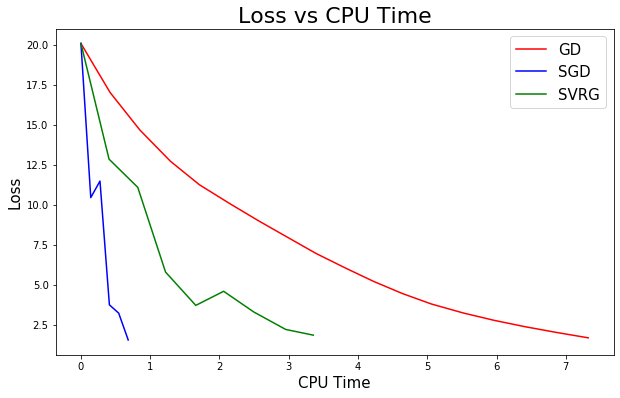

In [31]:
# Plot accuracy vs CPU time
plt.figure(figsize=(10,6))

plt.plot(timeVec_gd,loss_history_gd, color='red')

plt.plot(timeVec_sgd,loss_history_sgd, color='blue')

plt.plot(timeVec_svrg,loss_history_svrg, color='green')

plt.title('Loss vs CPU Time', fontsize=22)
plt.xlabel('CPU Time', fontsize=15)
plt.ylabel('Loss', fontsize=15)
z = plt.legend(('GD','SGD','SVRG'), fontsize=15)
